In [1]:
import joblib
import pandas as pd
import numpy as np
import os 
from itertools import compress
import random
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# Seed value
# Apparently you may use different seed values at each stage
seed_value = 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Import DS
merged_final=pd.read_csv('Final_Dataset_Sepsis_Identification.csv')

# Prepara Data for Machine Learning
y=[]
for i in merged_final['c_s']=='S':
    if i:
        y.append(1)
    else:        
        y.append(0)


print(merged_final.columns)

print(merged_final.columns)

X = merged_final[['avg_Mu', 'avg_s2', 'avg_K', 'avg_srr_tot', 'avg_srr_vlf',
        'avg_srr_lf', 'avg_srr_hf', 'avg_srr_lfn', 'avg_srr_hfn',
        'avg_srr_lfhf', 'avg_sbp_tot', 'avg_sbp_vlf', 'avg_sbp_lf',
        'avg_sbp_hf', 'avg_sbp_lfn', 'avg_sbp_hfn', 'avg_scr_tot',
        'avg_scr_vlf', 'avg_scr_lf', 'avg_scr_hf', 'avg_scr_lfn', 'avg_scr_hfn',
        'avg_gain21_lf', 'avg_gain21_hf', 'avg_gain12_lf', 'avg_gain12_hf',
        'NN20', 'pNN20', 'NN50', 'pNN50', 'logRMSSD',
        'SDSD', 'SD1', 'SD2', 'SD_ratio', 'SD_prod', 'TRI', 'TINN', 'AVSS',
        'SDSS', 'AVDD', 'SDDD', 'AVPP', 'SDPP', 'AVPAT', 'SDPAT',
        'RR_spect_slope', 'SS_spect_slope', 'DD_TOTPWR', 'DD_VLF', 'DD_LF', 'DD_HF',
        'DD_spect_slope', 'PP_TOTPWR', 'PP_VLF', 'PP_LF', 'PP_HF',
        'PP_spect_slope', 'PAT_TOTPWR', 'PAT_VLF', 'PAT_LF', 'PAT_HF',
        'PAT_spect_slope', 'Alpha1', 'H', 'SampEn', 'CorrDim',
        'LyapExp','Clinic1', 'vaso_flag', 'seda_flag', 'vent_flag','Clinic2','Clinic3']] #,'hypertension'

# Merge Clinic4 and CLinic5 in one Clinic6
Clinic6=np.sum(merged_final[['Clinic4', 'Clinic5']],axis=1)
X['Clinic6']=Clinic6

# Cast to int CLinic1
Clinic1=X.loc[:,'Clinic1']
X.loc[:,'Clinic1']= list(map(int, Clinic1))
# Filtering out Clinic1
print('Clinic1')
X_filt=X.loc[X['Clinic1']<90]
y_filt=list(compress(y,X['Clinic1']<90 ))
display(X_filt['Clinic1'].loc[[x==1 for x in y_filt]].describe())
display(X_filt['Clinic1'].loc[[x==0 for x in y_filt]].describe())
print(len(y_filt))

# Stratified Train-Test Split (80/20%)
X_TRAIN, X_TEST, y_train, y_test = train_test_split(X_filt, y_filt,test_size=0.2,random_state=seed_value,stratify=y_filt)

# Remove filename
X_train = X_TRAIN#.drop(['filename','subject_id','icustay_id','los','hosp_mortality','mortality_90','onset_delta'],axis=1)
X_test = X_TEST#.drop(['filename','subject_id','icustay_id','los','hosp_mortality','mortality_90','onset_delta'],axis=1)

# Check For Missings or Inf
X_train.isna().sum()
X_TRAIN.replace([np.inf, -np.inf], np.nan)
display(X_TRAIN[X_TRAIN.isna().any(axis=1)])

# Print Columns
print(X_train.columns)
print(len(X_train.columns))

Index(['avg_Mu', 'avg_s2', 'avg_K', 'avg_srr_tot', 'avg_srr_vlf', 'avg_srr_lf',
       'avg_srr_hf', 'avg_srr_lfn', 'avg_srr_hfn', 'avg_srr_lfhf',
       'avg_sbp_tot', 'avg_sbp_vlf', 'avg_sbp_lf', 'avg_sbp_hf', 'avg_sbp_lfn',
       'avg_sbp_hfn', 'avg_scr_tot', 'avg_scr_vlf', 'avg_scr_lf', 'avg_scr_hf',
       'avg_scr_lfn', 'avg_scr_hfn', 'avg_gain21_lf', 'avg_gain21_hf',
       'avg_gain12_lf', 'avg_gain12_hf', 'NN20', 'pNN20', 'NN50', 'pNN50',
       'logRMSSD', 'SDSD', 'SD1', 'SD2', 'SD_ratio', 'SD_prod', 'TRI', 'TINN',
       'AVSS', 'SDSS', 'AVDD', 'SDDD', 'AVPP', 'SDPP', 'AVPAT', 'SDPAT',
       'RR_spect_slope', 'SS_spect_slope', 'DD_TOTPWR', 'DD_VLF', 'DD_LF',
       'DD_HF', 'DD_spect_slope', 'PP_TOTPWR', 'PP_VLF', 'PP_LF', 'PP_HF',
       'PP_spect_slope', 'PAT_TOTPWR', 'PAT_VLF', 'PAT_LF', 'PAT_HF',
       'PAT_spect_slope', 'Alpha1', 'H', 'SampEn', 'CorrDim', 'LyapExp',
       'seda_flag', 'vaso_flag', 'vent_flag', 'Clinic1', 'Clinic2', 'Clinic3',
       'Clinic4', 'Clin

count    71.000000
mean     56.366197
std      17.180753
min      20.000000
25%      45.000000
50%      59.000000
75%      67.500000
max      86.000000
Name: Clinic1, dtype: float64

count    71.000000
mean     55.957746
std      15.638265
min      22.000000
25%      45.000000
50%      56.000000
75%      66.000000
max      88.000000
Name: Clinic1, dtype: float64

142


,avg_Mu,avg_s2,avg_K,avg_srr_tot,avg_srr_vlf,avg_srr_lf,avg_srr_hf,avg_srr_lfn,avg_srr_hfn,avg_srr_lfhf,...,SampEn,CorrDim,LyapExp,Clinic1,vaso_flag,seda_flag,vent_flag,Clinic2,Clinic3,Clinic6


Index(['avg_Mu', 'avg_s2', 'avg_K', 'avg_srr_tot', 'avg_srr_vlf', 'avg_srr_lf',
       'avg_srr_hf', 'avg_srr_lfn', 'avg_srr_hfn', 'avg_srr_lfhf',
       'avg_sbp_tot', 'avg_sbp_vlf', 'avg_sbp_lf', 'avg_sbp_hf', 'avg_sbp_lfn',
       'avg_sbp_hfn', 'avg_scr_tot', 'avg_scr_vlf', 'avg_scr_lf', 'avg_scr_hf',
       'avg_scr_lfn', 'avg_scr_hfn', 'avg_gain21_lf', 'avg_gain21_hf',
       'avg_gain12_lf', 'avg_gain12_hf', 'NN20', 'pNN20', 'NN50', 'pNN50',
       'logRMSSD', 'SDSD', 'SD1', 'SD2', 'SD_ratio', 'SD_prod', 'TRI', 'TINN',
       'AVSS', 'SDSS', 'AVDD', 'SDDD', 'AVPP', 'SDPP', 'AVPAT', 'SDPAT',
       'RR_spect_slope', 'SS_spect_slope', 'DD_TOTPWR', 'DD_VLF', 'DD_LF',
       'DD_HF', 'DD_spect_slope', 'PP_TOTPWR', 'PP_VLF', 'PP_LF', 'PP_HF',
       'PP_spect_slope', 'PAT_TOTPWR', 'PAT_VLF', 'PAT_LF', 'PAT_HF',
       'PAT_spect_slope', 'Alpha1', 'H', 'SampEn', 'CorrDim', 'LyapExp',
       'Clinic1', 'vaso_flag', 'seda_flag', 'vent_flag', 'Clinic2', 'Clinic3',
       'Clinic6'],
    

In [2]:
# Useful Functions

# Functions Definitions
# BOOTSTRAP
def bootstrapped_auc(y_true, y_pred, n_bootstraps = 1000, rng_seed = 42):

    import numpy as np
    from scipy.stats import sem
    from sklearn.metrics import precision_recall_curve,roc_curve, auc

    auroc_bootstrapped_scores=[]
    auprc_bootstrapped_scores=[]
    
    rng = np.random.RandomState(rng_seed)
    
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred), len(y_pred))
        #print(indices)
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        roc_auc = roc_auc_score(y_true[indices], y_pred[indices])
        auroc_bootstrapped_scores.append(roc_auc)
        
        precision, recall, _ = precision_recall_curve(y_true[indices], y_pred[indices])
        prc_auc = auc(recall,precision)
        auprc_bootstrapped_scores.append(prc_auc)
        '''print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))'''

    sorted_auroc_scores = np.array(auroc_bootstrapped_scores)
    sorted_auroc_scores.sort()
    sorted_auprc_scores = np.array(auprc_bootstrapped_scores)
    sorted_auprc_scores.sort()
    
    # Computing the lower and upper bound of the 95% CI
    auroc_confidence_lower = sorted_auroc_scores[int(0.025 * len(sorted_auroc_scores))]
    auroc_confidence_upper = sorted_auroc_scores[int(0.975 * len(sorted_auroc_scores))]
    auprc_confidence_lower = sorted_auprc_scores[int(0.025 * len(sorted_auprc_scores))]
    auprc_confidence_upper = sorted_auprc_scores[int(0.975 * len(sorted_auprc_scores))]
    '''print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))'''
    
    return auroc_confidence_lower, auroc_confidence_upper, auprc_confidence_lower, auprc_confidence_upper


# Function that returns the threshold corresponding to the closest point to (1,0) on the ROC curve 
def find_best_th_roc(ytrain, temp_ytrain_hat):
    from sklearn.metrics import roc_curve
    if len(np.unique(temp_ytrain_hat))<3 or (max(np.diff(np.sort(temp_ytrain_hat)))>0.7):
        best_th_roc=0.5
    else:
        fpr_train, tpr_train, th_roc_train = roc_curve(ytrain, temp_ytrain_hat)
        best_point_roc_x = np.array([0] * fpr_train.shape[0])
        best_point_roc_y = np.array([1] * tpr_train.shape[0])
        temp_x = (fpr_train - best_point_roc_x)
        temp_y = (tpr_train - best_point_roc_y)
        temp_sqrt = np.sqrt(np.square(temp_x) + np.square(temp_y))
        #plt.plot(temp_sqrt)
        #plt.show()
        index_min_temp_sqrt = np.argmin(temp_sqrt)
        best_th_roc = th_roc_train[index_min_temp_sqrt]
    return best_th_roc

# Function that returns the threshold corresponding to the minimum value of the abs(precision-recall) curve
def find_best_th_pr(ytrain, temp_ytrain_hat):
    from sklearn.metrics import precision_recall_curve
    if (len(np.unique(temp_ytrain_hat))<3) or (max(np.diff(np.sort(temp_ytrain_hat)))>0.7):
        best_th_pr=0.5
    else:
        pre_train, rec_train, th_prc_train = precision_recall_curve(ytrain, temp_ytrain_hat)
        plt.plot((abs(pre_train - rec_train)))
        plt.show()

        index_min_abs_prerec = np.argmin((abs(pre_train - rec_train)))
        best_th_pr = th_prc_train[index_min_abs_prerec]
    return best_th_pr

In [3]:
# Feature Transformation, Feature Selection, Feature Scaler, Classifiers

from sklearn.pipeline import Pipeline
import os
from pathlib import Path
import joblib

from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import ShuffleSplit,StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#Transformer
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
#Feature Selector
from sklearn.feature_selection import SelectFromModel, VarianceThreshold, SelectKBest, SelectFdr, SelectFwe
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV


from sklearn.linear_model import LogisticRegression,LogisticRegressionCV, ElasticNet
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

root_path=os.getcwd()
root_path=Path(root_path)

if os.path.isdir(root_path/('Plots')):
    print('Exist')
else:
    os.mkdir(root_path/('Plots'))


CV = 3
conf_ind=6 # Number of binary confoundings/features at the end of the table

feat_selector = ['passthrough',
                Pipeline(steps=[('scl', MinMaxScaler()), ('fs',RFECV(LogisticRegression(), step=1, cv=10))]),
                Pipeline(steps=[('scl', MinMaxScaler()), 
                                ('fs', RFECV(SVC(kernel="linear",random_state=seed_value), step=1, cv=10))]),
                Pipeline(steps=[('scl', MinMaxScaler())
                               ,('skb', SelectKBest(chi2, k=int(round(np.sqrt(X_train.shape[0])))))]),
                Pipeline(steps=[('scl', MinMaxScaler()), 
                                ('fs', SelectKBest(mutual_info_classif, k=int(round(np.sqrt(X_train.shape[0])))))]),
                #SelectFromModel(LogisticRegression(penalty='l1',solver='saga')) #LASSO penalty
                Pipeline(steps=[('scl', MinMaxScaler()), 
                                ('fs', SelectFromModel(LogisticRegressionCV(cv=10, penalty='l1',solver='saga')))])
                ]

Pipe_Yeo = Pipeline(steps=[('scl',StandardScaler()),('tr',PowerTransformer(method='yeo-johnson',standardize=False))])
Pipe_Box = Pipeline(steps=[('scl',MinMaxScaler(feature_range=(1, 2))),('tr',PowerTransformer(method='box-cox',standardize=False))])

# Try 2 Different Transformers (They Already Standardize Data)
transformer = ['passthrough',Pipe_Yeo,Pipe_Box 
               ,QuantileTransformer(output_distribution='normal',random_state=seed_value)
               ,QuantileTransformer(output_distribution='uniform',random_state=seed_value)]
scaler = [MinMaxScaler(), StandardScaler(), RobustScaler()]


classifiers = [KNeighborsClassifier(), # neighbors
    SVC(kernel='linear',probability=True, random_state=seed_value), #C
    SVC(kernel='rbf',probability=True, random_state=seed_value),
    MLPClassifier(activation='logistic',alpha=1, max_iter=1000),
    LogisticRegression(),
    DecisionTreeClassifier(random_state=seed_value),
    xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, max_delta_step=0,
       min_child_weight=1, missing=None, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=seed_value, subsample=1),
    ]

fsel_list=['None','RFECV_LR','RFECV_SVM','KBEST_CHI2','KBEST_MI','LASSO']
transf_list=['None','Yeo-John','Box-Cox','Quant_Gaus','Quant_Unif']
scaler_list=['MinMax','StdScal','Robust']
clf_list=['KNN','SVC_lin','SVC_rbf','MLP','LR','TREE','XGB']

# Build Parameters Grid


pargrid=[{'classifier__n_neighbors':[2,3,5],
          'classifier__leaf_size':[3,10,30],
     'classifier__weights':['uniform', 'distance']},
    {'classifier__C':[0.1,0.5,1]},
    {'classifier__C':[0.1,0.5,1]},
    {'classifier__hidden_layer_sizes':[5,50,100],
     'classifier__learning_rate':['costant','adaptive']},
    {},
    {'classifier__criterion':['gini','entropy'],
        'classifier__max_depth':[2,3,5],
        'classifier__min_samples_split':[3,5],
        'classifier__min_samples_leaf':[1,2,3,5],
        'classifier__max_features':['sqrt','log2',None],
        'classifier__class_weight':[None,'balanced']}, # Decision Tree
    {'classifier__n_estimators':[100,250,500],
        'classifier__max_depth':[2,3,5],
        'classifier__learning_rate':[0.1,0.5,1]}
        ]

PIPES=[]
PIPES_DETAILS=[]

for transf,tf_lst in zip(transformer,transf_list):
    for feat_sel,fslist in zip(feat_selector,fsel_list):
                
        print(transf)
        print(fslist)
        column_transformer = ColumnTransformer(
            transformers=[('transformer', transf, X_train.columns[:-conf_ind])#
                          ,('no_transf', 'passthrough', X_train.columns[-conf_ind:])
                         ])
        pipe = Pipeline(steps=[('union', column_transformer)
                               #,('scal',MinMaxScaler()) # To give normalized data but without changing their  distribution
                               ,('feat_sel',feat_sel)])
        
        pipe.fit(X_train.copy(), y_train.copy())
        PIPES.append(pipe)
        PIPES_DETAILS.append([tf_lst,fslist])

print('feat_done')

# Initialize Vars
y_proba=[]
y_score=[]
best=[]
best_th_roc=[]

RESULTS_test=pd.DataFrame()

count=0
L=len(fsel_list)*len(clf_list)*len(transf_list)*len(scaler_list)

for pp,ppd in zip(PIPES,PIPES_DETAILS):
            for scal,sc_lst in zip(scaler,scaler_list):
                for classifier,pgrid,clf_lst in zip(classifiers,pargrid,clf_list):

                    count+=1
                    print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
                    print(str(count)+'/'+str(L))
                    print(ppd[0])
                    print(ppd[1])
                    print(sc_lst) 
                    print(clf_lst)
                    print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
                    print()
                    
                    # Build Pipeline 
                    pipe = Pipeline(steps=[('scaler',scal),
                                           ('classifier', classifier)])

                    # Parameters Grid For Grid Search
                    param_grid = pgrid

                    # Grid Search With Scoring F1 And Then Refit With All Passed Observation (10-Fold CV)
                    search = GridSearchCV(pipe, param_grid, cv=CV, n_jobs=-1, 
                                          scoring=['accuracy','f1','roc_auc','recall','precision'],refit='roc_auc')
                    
                    # Prepare the Data
                    X_tr_transf=pp.transform(X_train.copy())
                    X_te_transf=pp.transform(X_test.copy())
                    
                    # Fit Grid Search On Training Data with Hyperparametr Optimization In a 10-Fold Stratified CV
                    search.fit(X_tr_transf.copy(), np.array(y_train.copy()))

                    # Best Estimator Etraction
                    GSCV_results=pd.DataFrame(search.cv_results_) # Convert to Dataframe Grid Search CV Results

                    # Automatic Selection of Best Estimator (Inner Criteria: Maximum Average of Selected Refit Score )
                    best_pipe=search.best_estimator_
                    best_results=GSCV_results.loc[search.best_index_,:]
                    best_params = best_pipe.get_params()

                    # Extract Predicted Probabilities
                    y_proba_tr=best_pipe.predict_proba(X_tr_transf.copy())
                    y_proba.append(best_pipe.predict_proba(X_te_transf.copy())) # Compute Probabilities

                    # Save Best Pipeline
                    curr_full_pipe=Pipeline(steps=[('first',pp),
                                                   ('clf',best_pipe)])
                    best.append(best_pipe)

                    # 10 Fold CV scores - Takes Too Long
                    '''
                    cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=seed_value)
                    cv_scores = cross_validate(search, X, y, cv=cv,
                                    scoring=('accuracy','f1','roc_auc'),
                                    return_train_score=True)
                    y_score.append(cv_scores)
                    print(cv_scores)
                    '''

                    # Plot Performance Measures at Each Cycle
                    # AUROC
                    fpr0, tpr0, _ = roc_curve(y_train, y_proba_tr[:, 1])
                    roc_auc0 = auc(fpr0, tpr0)
                    fpr, tpr, _ = roc_curve(y_test, y_proba[-1][:, 1])
                    roc_auc = auc(fpr, tpr)
                    # AUPRC
                    precision0, recall0, _ = precision_recall_curve(y_train, y_proba_tr[:, 1])
                    prc_auc0= auc(recall0,precision0)
                    precision, recall, _ = precision_recall_curve(y_test, y_proba[-1][:, 1])
                    prc_auc = auc(recall,precision)

                    # Optimal Threshold On Training Data
                    best_th_roc.append(find_best_th_roc(y_train, y_proba_tr[:,1]))
                    #best_th_roc.append(find_best_th_pr(y_train, best_pipe.predict_proba(X_train)[:,1]))

                    # Extract Optimal Threshold
                    cm=confusion_matrix(y_test, y_proba[-1][:,1]>best_th_roc[-1])
                    tn, fp, fn, tp=confusion_matrix(y_test, y_proba[-1][:,1]>best_th_roc[-1]).ravel()

                    # Compute Bootstrapped Confidence Intervals
                    auroc_cilw0, auroc_ciup0, auprc_cilw0, auprc_ciup0=bootstrapped_auc(np.array(y_train), y_proba_tr[:, 1],
                                                                                    n_bootstraps = 200, rng_seed = 0)
                    auroc_cilw, auroc_ciup, auprc_cilw, auprc_ciup=bootstrapped_auc(np.array(y_test), y_proba[-1][:, 1],
                                                                                    n_bootstraps = 200, rng_seed = 0)
                    # Plot AUROC and AUPRC
                    fig = plt.figure(figsize=(12,8))
                    ax1 = fig.add_subplot(1,2,1)
                    ax2 = fig.add_subplot(1,2,2)
                    lw = 2

                    # AUROC
                    ax1.plot(fpr0, tpr0, color='darkgreen',linestyle='-.',
                             lw=lw, label='Train ROC (AUC=%0.2f - CI=[%0.2f,%0.2f])' % (roc_auc0,auroc_cilw0,auroc_ciup0))
                    ax1.plot(fpr, tpr, color='darkgreen',
                             lw=lw, label='Test ROC (AUC=%0.2f - CI=[%0.2f,%0.2f])' % (roc_auc,auroc_cilw,auroc_ciup))
                    ax1.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--', label='ROC Ref = 0.5')
                    ax1.set_xlim([0.0, 1.0])
                    ax1.set_ylim([0.0, 1.05])
                    ax1.set_xlabel('False Positive Rate',fontsize=18)
                    ax1.set_ylabel('Recall',fontsize=18)
                    ax1.legend(loc="lower right",fontsize=12)
                    ax1.set_title('Receiving Operating Characteristic Curve',fontsize=18)
                    # AUPRC
                    ax2.plot(recall0, precision0, color='darkorange', linestyle='-.',
                             lw=lw, label='Train PRC (AUC=%0.2f - CI=[%0.2f,%0.2f])' % (prc_auc0,auprc_cilw0,auprc_ciup0))
                    ax2.plot(recall, precision, color='darkorange',
                             lw=lw, label='Test PRC (AUC=%0.2f - CI=[%0.2f,%0.2f])' % (prc_auc,auprc_cilw,auprc_ciup))
                    ax2.plot([0, 1], [sum(y_test)/len(y_test),sum(y_test)/len(y_test)],
                             color='orange', lw=lw, linestyle='--', label='PRC Ref = '+ str(round(sum(y_test)/len(y_test),2)))
                    ax2.set_xlim([0.0, 1.0])
                    ax2.set_ylim([0.0, 1.05])
                    ax2.set_xlabel('Recall',fontsize=18)
                    ax2.set_ylabel('Precision',fontsize=18)
                    ax2.legend(loc="lower right",fontsize=12)
                    ax2.set_title('Precision-Recall Curve',fontsize=18)

                    #Plot Layout
                    plt.tight_layout()


                    # Store Results in DataFrame 
                    dic={'Transformer':ppd[0],'Feat_Sel':ppd[1], 'Feat_Scal':sc_lst,'Classifier':clf_lst,
                         'Pipeline':best_pipe, 'Full_Pipeline':curr_full_pipe,
                         'AUROC':round(roc_auc,4),'AUROC_CI':[round(auroc_cilw,4), round(auroc_ciup,4)],
                         'AUPRC':round(prc_auc,4),'AUPRC_CI':[round(auprc_cilw,4), round(auprc_ciup,4)],
                         'Threshold':best_th_roc[-1],'CM':cm,'TP':tp,'FP':fp,'TN':tn,'FN':fn}
                    df_temp=pd.DataFrame.from_dict(data=dic, orient='index').transpose()
                    df_temp
                    RESULTS_test=RESULTS_test.append(df_temp, ignore_index=True)
                    del df_temp

                    #display(RESULTS_test)

                    # Save Plot - Using the index of the 'RESULTS_Test' DataFrame as Identifier
                    #!!!! UNCOMMENT TO SAVE
                    plt.savefig(root_path/('Plots/Results Index - '+str(RESULTS_test.index[-1])+'.png'),dpi=300)

                    # Show Plot
                    #plt.show()
                    plt.close()
                    
                    #!!!! UNCOMMENT TO SAVE
                    joblib.dump(RESULTS_test,root_path / 'Results')

RESULTS_test_2=RESULTS_test
display(RESULTS_test_2)
del RESULTS_test

#!!!! UNCOMMENT TO SAVE
joblib.dump(RESULTS_test_2,root_path / 'Results')
print("DONE")

Exist
passthrough
None
passthrough
RFECV_LR
passthrough
RFECV_SVM
passthrough
KBEST_CHI2
passthrough
KBEST_MI
passthrough
LASSO
Pipeline(steps=[('scl', StandardScaler()),
                ('tr', PowerTransformer(standardize=False))])
None
Pipeline(steps=[('scl', StandardScaler()),
                ('tr', PowerTransformer(standardize=False))])
RFECV_LR
Pipeline(steps=[('scl', StandardScaler()),
                ('tr', PowerTransformer(standardize=False))])
RFECV_SVM
Pipeline(steps=[('scl', StandardScaler()),
                ('tr', PowerTransformer(standardize=False))])
KBEST_CHI2
Pipeline(steps=[('scl', StandardScaler()),
                ('tr', PowerTransformer(standardize=False))])
KBEST_MI
Pipeline(steps=[('scl', StandardScaler()),
                ('tr', PowerTransformer(standardize=False))])
LASSO
Pipeline(steps=[('scl', MinMaxScaler(feature_range=(1, 2))),
                ('tr', PowerTransformer(method='box-cox', standardize=False))])
None
Pipeline(steps=[('scl', MinMaxScaler(feature_r

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
44/630
None
RFECV_SVM
MinMax
SVC_lin
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
45/630
None
RFECV_SVM
MinMax
SVC_rbf
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
46/630
None
RFECV_SVM
MinMax
MLP
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
47/630
None
RFECV_SVM
MinMax
LR
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
48/630
None
RFECV_SVM
MinMax
TREE
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
49/630
None
RFECV_SVM
MinMax
XGB
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
50/630
None
RFECV_SVM
StdScal
KNN
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
104/630
None
KBEST_MI
Robust
TREE
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
105/630
None
KBEST_MI
Robust
XGB
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
106/630
None
LASSO
MinMax
KNN
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
107/630
None
LASSO
MinMax
SVC_lin
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
108/630
None
LASSO
MinMax
SVC_rbf
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
109/630
None
LASSO
MinMax
MLP
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
110/630
None
LASSO
MinMax
LR
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
111/

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
164/630
Yeo-John
RFECV_LR
Robust
SVC_rbf
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
165/630
Yeo-John
RFECV_LR
Robust
MLP
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
166/630
Yeo-John
RFECV_LR
Robust
LR
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
167/630
Yeo-John
RFECV_LR
Robust
TREE
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
168/630
Yeo-John
RFECV_LR
Robust
XGB
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
169/630
Yeo-John
RFECV_SVM
MinMax
KNN
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
170/630
Yeo-John
RFECV_SVM
MinMax
SVC_lin
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
222/630
Yeo-John
KBEST_MI
StdScal
LR
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
223/630
Yeo-John
KBEST_MI
StdScal
TREE
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
224/630
Yeo-John
KBEST_MI
StdScal
XGB
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
225/630
Yeo-John
KBEST_MI
Robust
KNN
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
226/630
Yeo-John
KBEST_MI
Robust
SVC_lin
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
227/630
Yeo-John
KBEST_MI
Robust
SVC_rbf
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
228/630
Yeo-John
KBEST_MI
Robust
MLP
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
282/630
Box-Cox
RFECV_LR
StdScal
SVC_lin
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
283/630
Box-Cox
RFECV_LR
StdScal
SVC_rbf
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
284/630
Box-Cox
RFECV_LR
StdScal
MLP
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
285/630
Box-Cox
RFECV_LR
StdScal
LR
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
286/630
Box-Cox
RFECV_LR
StdScal
TREE
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
287/630
Box-Cox
RFECV_LR
StdScal
XGB
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
288/630
Box-Cox
RFECV_LR
Robust
KNN
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
340/630
Box-Cox
KBEST_MI
MinMax
MLP
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
341/630
Box-Cox
KBEST_MI
MinMax
LR
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
342/630
Box-Cox
KBEST_MI
MinMax
TREE
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
343/630
Box-Cox
KBEST_MI
MinMax
XGB
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
344/630
Box-Cox
KBEST_MI
StdScal
KNN
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
345/630
Box-Cox
KBEST_MI
StdScal
SVC_lin
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
346/630
Box-Cox
KBEST_MI
StdScal
SVC_rbf
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
399/630
Quant_Gaus
None
Robust
XGB
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
400/630
Quant_Gaus
RFECV_LR
MinMax
KNN
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
401/630
Quant_Gaus
RFECV_LR
MinMax
SVC_lin
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
402/630
Quant_Gaus
RFECV_LR
MinMax
SVC_rbf
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
403/630
Quant_Gaus
RFECV_LR
MinMax
MLP
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
404/630
Quant_Gaus
RFECV_LR
MinMax
LR
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
405/630
Quant_Gaus
RFECV_LR
MinMax
TREE
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
456/630
Quant_Gaus
KBEST_CHI2
Robust
KNN
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
457/630
Quant_Gaus
KBEST_CHI2
Robust
SVC_lin
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
458/630
Quant_Gaus
KBEST_CHI2
Robust
SVC_rbf
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
459/630
Quant_Gaus
KBEST_CHI2
Robust
MLP
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
460/630
Quant_Gaus
KBEST_CHI2
Robust
LR
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
461/630
Quant_Gaus
KBEST_CHI2
Robust
TREE
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
462/630
Quant_Gaus
KBEST_CHI2
Robust
XGB
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
514/630
Quant_Unif
None
StdScal
SVC_rbf
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
515/630
Quant_Unif
None
StdScal
MLP
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
516/630
Quant_Unif
None
StdScal
LR
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
517/630
Quant_Unif
None
StdScal
TREE
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
518/630
Quant_Unif
None
StdScal
XGB
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
519/630
Quant_Unif
None
Robust
KNN
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
520/630
Quant_Unif
None
Robust
SVC_lin
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
572/630
Quant_Unif
KBEST_CHI2
MinMax
LR
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
573/630
Quant_Unif
KBEST_CHI2
MinMax
TREE
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
574/630
Quant_Unif
KBEST_CHI2
MinMax
XGB
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
575/630
Quant_Unif
KBEST_CHI2
StdScal
KNN
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
576/630
Quant_Unif
KBEST_CHI2
StdScal
SVC_lin
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
577/630
Quant_Unif
KBEST_CHI2
StdScal
SVC_rbf
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
578/630
Quant_Unif
KBEST_CHI2
StdScal
MLP
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
630/630
Quant_Unif
LASSO
Robust
XGB
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



,Transformer,Feat_Sel,Feat_Scal,Classifier,Pipeline,Full_Pipeline,AUROC,AUROC_CI,AUPRC,AUPRC_CI,Threshold,CM,TP,FP,TN,FN
0,None,None,MinMax,KNN,"(MinMaxScaler(), KNeighborsClassifier(leaf_siz...",((ColumnTransformer(transformers=[('transforme...,0.7667,"[0.5905, 0.9333]",0.799,"[0.5162, 0.9538]",0.5,"[[15, 0], [8, 6]]",6,0,15,8
1,None,None,MinMax,SVC_lin,"(MinMaxScaler(), SVC(C=0.1, kernel='linear', p...",((ColumnTransformer(transformers=[('transforme...,0.781,"[0.5895, 0.9361]",0.8129,"[0.6038, 0.9552]",0.506814,"[[13, 2], [6, 8]]",8,2,13,6
2,None,None,MinMax,SVC_rbf,"(MinMaxScaler(), SVC(C=1, probability=True, ra...",((ColumnTransformer(transformers=[('transforme...,0.769,"[0.5476, 0.9238]",0.8217,"[0.6215, 0.9429]",0.507129,"[[13, 2], [6, 8]]",8,2,13,6
3,None,None,MinMax,MLP,"(MinMaxScaler(), MLPClassifier(activation='log...",((ColumnTransformer(transformers=[('transforme...,0.7476,"[0.5421, 0.9265]",0.7949,"[0.5771, 0.9549]",0.488592,"[[13, 2], [4, 10]]",10,2,13,4
4,None,None,MinMax,LR,"(MinMaxScaler(), LogisticRegression())",((ColumnTransformer(transformers=[('transforme...,0.7429,"[0.5253, 0.919]",0.7925,"[0.5963, 0.9383]",0.531007,"[[13, 2], [8, 6]]",6,2,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Quant_Unif,LASSO,Robust,SVC_rbf,"(RobustScaler(), SVC(C=0.5, probability=True, ...",((ColumnTransformer(transformers=[('transforme...,0.6143,"[0.3788, 0.819]",0.7037,"[0.4663, 0.8861]",0.527941,"[[11, 4], [7, 7]]",7,4,11,7
626,Quant_Unif,LASSO,Robust,MLP,"(RobustScaler(), MLPClassifier(activation='log...",((ColumnTransformer(transformers=[('transforme...,0.6381,"[0.4141, 0.8316]",0.6939,"[0.4309, 0.8925]",0.430055,"[[9, 6], [7, 7]]",7,6,9,7
627,Quant_Unif,LASSO,Robust,LR,"(RobustScaler(), LogisticRegression())",((ColumnTransformer(transformers=[('transforme...,0.6238,"[0.3838, 0.8105]",0.7016,"[0.4711, 0.8863]",0.573467,"[[13, 2], [7, 7]]",7,2,13,7
628,Quant_Unif,LASSO,Robust,TREE,"(RobustScaler(), DecisionTreeClassifier(max_de...",((ColumnTransformer(transformers=[('transforme...,0.5905,"[0.3636, 0.7816]",0.6636,"[0.3977, 0.8672]",0.555556,"[[13, 2], [8, 6]]",6,2,13,8


DONE


In [4]:
import matplotlib.pyplot as plt


DF=joblib.load(root_path / 'Results')
df=DF.copy()

# Extract Best Performing
TT=df.sort_values(by=['AUROC','TP','TN'], ascending=False).reset_index()
display(TT.iloc[0:10,:])
display(TT.iloc[-10:,:])

TT_best=TT.iloc[0:10,:]
TT_best.loc[:,'AUROC']=[round(x,2) for x in TT_best.loc[:,'AUROC']]
TT_best.loc[:,'AUPRC']=[round(x,2) for x in TT_best.loc[:,'AUPRC']]
TT_best['AUROC_CI']=[[round(x[0],2),round(x[1],2)] for x in TT_best['AUROC_CI']]
TT_best['AUPRC_CI']=[[round(x[0],2),round(x[1],2)] for x in TT_best['AUPRC_CI']]
TT_best['Recall']=[round(x,2) for x in TT_best['TP']/(TT_best['TP']+TT_best['FN'])]
TT_best['Precision']=[round(x,2) for x in TT_best['TP']/(TT_best['TP']+TT_best['FP'])]
TT_best['Specificity']=[round(x,2) for x in TT_best['TN']/(TT_best['TN']+TT_best['FP'])]
TT_best['F1']=[round(x,2) for x in 2*TT_best['TP']/(2*TT_best['TP']+TT_best['FP']+TT_best['FN'])]
display(TT_best)

auroc_cil=[x[0] for x in TT_best['AUROC_CI']]
TT_best['AUROC_CI_L']=auroc_cil
auroc_ciu=[x[1] for x in TT_best['AUROC_CI']]
TT_best['AUROC_CI_U']=auroc_ciu
auprc_cil=[x[0] for x in TT_best['AUPRC_CI']]
TT_best['AUPRC_CI_L']=auprc_cil
auprc_ciu=[x[1] for x in TT_best['AUPRC_CI']]
TT_best['AUPRC_CI_U']=auprc_ciu
auroc=[]
for x0,x1,x2 in zip(TT_best['AUROC'],TT_best['AUROC_CI_L'],TT_best['AUROC_CI_U']):
    auroc.append(str(x0)+' +/- ('+str(x1)+'-'+str(x2)+')')
auprc=[]
for x0,x1,x2 in zip(TT_best['AUPRC'],TT_best['AUPRC_CI_L'],TT_best['AUPRC_CI_U']):
    auprc.append(str(x0)+' +/- ('+str(x1)+'-'+str(x2)+')')
    
TT_best['auroc']=auroc
TT_best['auprc']=auprc

TT_best['Threshold']=[round(x,2) for x in TT_best['Threshold']]

TT_best[['Transformer','Feat_Sel','Feat_Scal',
         'Classifier','auroc','auprc','Threshold','Recall',
         'Precision','Specificity','F1']].to_csv('Best_Results.csv',header=True,index=False)

#display(TT)
pd.set_option('display.max_rows', None)
#plt.figure(figsize=(40,60))
imp,names = zip(*sorted(zip(abs(TT['Pipeline'][0]['classifier'].coef_[0]),X_train.columns)))
'''plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names,fontsize=40)
plt.xticks(fontsize=40)
plt.title('Feature Importance SVC_lin',fontsize=40)
plt.savefig('FI_SVC_Lin.png',dpi=300)
plt.show()
'''
Imp1=pd.DataFrame([round(i,2) for i in imp],[j for j in names])
Imp1=Imp1.sort_values(by=Imp1.columns[0],ascending=False)
Imp1.to_csv('Importance_SVC.csv')
display(Imp1)

#plt.figure(figsize=(40,60))
imp,names = zip(*sorted(zip(abs(TT['Pipeline'][1]['classifier'].coef_[0]),X_train.columns)))
'''plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names,fontsize=40)
plt.xticks(fontsize=40)
plt.title('Feature Importance LR',fontsize=40)
plt.savefig('FI_LR.png',dpi=300)
plt.show()'''

Imp2=pd.DataFrame([round(i,2) for i in imp],[j for j in names])
display(Imp2)
Imp2=Imp2.sort_values(by=Imp2.columns[0],ascending=False)
display(Imp2)
Imp2.to_csv('Importance_LR.csv')
display(Imp2)

,index,Transformer,Feat_Sel,Feat_Scal,Classifier,Pipeline,Full_Pipeline,AUROC,AUROC_CI,AUPRC,AUPRC_CI,Threshold,CM,TP,FP,TN,FN
0,393,Quant_Gaus,None,Robust,SVC_lin,"(RobustScaler(), SVC(C=0.5, kernel='linear', p...",((ColumnTransformer(transformers=[('transforme...,0.919,"[0.7885, 0.9951]",0.8987,"[0.7296, 0.9966]",0.466122,"[[12, 3], [2, 12]]",12,3,12,2
1,396,Quant_Gaus,None,Robust,LR,"(RobustScaler(), LogisticRegression())",((ColumnTransformer(transformers=[('transforme...,0.9143,"[0.7837, 1.0]",0.8989,"[0.7227, 1.0]",0.50275,"[[14, 1], [3, 11]]",11,1,14,3
2,386,Quant_Gaus,None,StdScal,SVC_lin,"(StandardScaler(), SVC(C=0.5, kernel='linear',...",((ColumnTransformer(transformers=[('transforme...,0.9095,"[0.7881, 0.9949]",0.9006,"[0.7428, 0.9953]",0.509388,"[[14, 1], [6, 8]]",8,1,14,6
3,389,Quant_Gaus,None,StdScal,LR,"(StandardScaler(), LogisticRegression())",((ColumnTransformer(transformers=[('transforme...,0.9,"[0.7632, 1.0]",0.889,"[0.7002, 1.0]",0.505293,"[[14, 1], [4, 10]]",10,1,14,4
4,395,Quant_Gaus,None,Robust,MLP,"(RobustScaler(), MLPClassifier(activation='log...",((ColumnTransformer(transformers=[('transforme...,0.8857,"[0.7381, 0.9902]",0.8379,"[0.6355, 0.9922]",0.519608,"[[13, 2], [4, 10]]",10,2,13,4
5,388,Quant_Gaus,None,StdScal,MLP,"(StandardScaler(), MLPClassifier(activation='l...",((ColumnTransformer(transformers=[('transforme...,0.8857,"[0.7323, 0.9902]",0.8691,"[0.6837, 0.9894]",0.452619,"[[13, 2], [5, 9]]",9,2,13,5
6,137,Yeo-John,None,StdScal,LR,"(StandardScaler(), LogisticRegression())",((ColumnTransformer(transformers=[('transforme...,0.8524,"[0.7, 0.9571]",0.8546,"[0.6718, 0.9656]",0.487204,"[[14, 1], [7, 7]]",7,1,14,7
7,263,Box-Cox,None,StdScal,LR,"(StandardScaler(), LogisticRegression())",((ColumnTransformer(transformers=[('transforme...,0.8524,"[0.6952, 0.9596]",0.8499,"[0.6675, 0.9656]",0.425423,"[[11, 4], [7, 7]]",7,4,11,7
8,141,Yeo-John,None,Robust,SVC_lin,"(RobustScaler(), SVC(C=1, kernel='linear', pro...",((ColumnTransformer(transformers=[('transforme...,0.85,"[0.7121, 0.9657]",0.8466,"[0.6803, 0.9659]",0.491456,"[[13, 2], [7, 7]]",7,2,13,7
9,267,Box-Cox,None,Robust,SVC_lin,"(RobustScaler(), SVC(C=0.5, kernel='linear', p...",((ColumnTransformer(transformers=[('transforme...,0.8476,"[0.7048, 0.9615]",0.835,"[0.6176, 0.9636]",0.487055,"[[12, 3], [5, 9]]",9,3,12,5


,index,Transformer,Feat_Sel,Feat_Scal,Classifier,Pipeline,Full_Pipeline,AUROC,AUROC_CI,AUPRC,AUPRC_CI,Threshold,CM,TP,FP,TN,FN
620,513,Quant_Unif,None,StdScal,SVC_rbf,"(StandardScaler(), SVC(C=0.5, probability=True...",((ColumnTransformer(transformers=[('transforme...,0.3095,"[0.1373, 0.5152]",0.365,"[0.2127, 0.5783]",1.54523,"[[15, 0], [14, 0]]",0,0,15,14
621,534,Quant_Unif,RFECV_LR,StdScal,SVC_rbf,"(StandardScaler(), SVC(C=0.1, probability=True...",((ColumnTransformer(transformers=[('transforme...,0.3,"[0.1324, 0.5466]",0.3674,"[0.2133, 0.5987]",0.466481,"[[0, 15], [1, 13]]",13,15,0,1
622,345,Box-Cox,KBEST_MI,StdScal,SVC_rbf,"(StandardScaler(), SVC(C=1, probability=True, ...",((ColumnTransformer(transformers=[('transforme...,0.3,"[0.1167, 0.4952]",0.453,"[0.2411, 0.6553]",1.50722,"[[15, 0], [14, 0]]",0,0,15,14
623,548,Quant_Unif,RFECV_SVM,MinMax,SVC_rbf,"(MinMaxScaler(), SVC(C=0.1, probability=True, ...",((ColumnTransformer(transformers=[('transforme...,0.2881,"[0.081, 0.5286]",0.4315,"[0.2344, 0.6756]",0.508878,"[[7, 8], [10, 4]]",4,8,7,10
624,590,Quant_Unif,KBEST_MI,MinMax,SVC_rbf,"(MinMaxScaler(), SVC(C=0.5, probability=True, ...",((ColumnTransformer(transformers=[('transforme...,0.281,"[0.098, 0.4952]",0.4373,"[0.2135, 0.687]",0.506059,"[[2, 13], [8, 6]]",6,13,2,8
625,191,Yeo-John,KBEST_CHI2,MinMax,SVC_rbf,"(MinMaxScaler(), SVC(C=0.1, probability=True, ...",((ColumnTransformer(transformers=[('transforme...,0.2762,"[0.1053, 0.5111]",0.3749,"[0.2133, 0.6466]",0.481258,"[[4, 11], [10, 4]]",4,11,4,10
626,317,Box-Cox,KBEST_CHI2,MinMax,SVC_rbf,"(MinMaxScaler(), SVC(C=0.1, probability=True, ...",((ColumnTransformer(transformers=[('transforme...,0.2762,"[0.1053, 0.5111]",0.3749,"[0.2133, 0.6466]",0.482079,"[[4, 11], [10, 4]]",4,11,4,10
627,408,Quant_Gaus,RFECV_LR,StdScal,SVC_rbf,"(StandardScaler(), SVC(C=0.1, probability=True...",((ColumnTransformer(transformers=[('transforme...,0.2762,"[0.0952, 0.5238]",0.3766,"[0.2172, 0.6517]",0.508962,"[[9, 6], [11, 3]]",3,6,9,11
628,527,Quant_Unif,RFECV_LR,MinMax,SVC_rbf,"(MinMaxScaler(), SVC(C=0.1, probability=True, ...",((ColumnTransformer(transformers=[('transforme...,0.2738,"[0.1127, 0.4833]",0.3608,"[0.2153, 0.5924]",0.509541,"[[8, 7], [11, 3]]",3,7,8,11
629,471,Quant_Gaus,KBEST_MI,StdScal,SVC_rbf,"(StandardScaler(), SVC(C=0.5, probability=True...",((ColumnTransformer(transformers=[('transforme...,0.2452,"[0.081, 0.45]",0.3681,"[0.2176, 0.6435]",0.5,"[[1, 14], [8, 6]]",6,14,1,8


,index,Transformer,Feat_Sel,Feat_Scal,Classifier,Pipeline,Full_Pipeline,AUROC,AUROC_CI,AUPRC,...,Threshold,CM,TP,FP,TN,FN,Recall,Precision,Specificity,F1
0,393,Quant_Gaus,None,Robust,SVC_lin,"(RobustScaler(), SVC(C=0.5, kernel='linear', p...",((ColumnTransformer(transformers=[('transforme...,0.92,"[0.79, 1.0]",0.90,...,0.466122,"[[12, 3], [2, 12]]",12,3,12,2,0.86,0.80,0.80,0.83
1,396,Quant_Gaus,None,Robust,LR,"(RobustScaler(), LogisticRegression())",((ColumnTransformer(transformers=[('transforme...,0.91,"[0.78, 1.0]",0.90,...,0.50275,"[[14, 1], [3, 11]]",11,1,14,3,0.79,0.92,0.93,0.85
2,386,Quant_Gaus,None,StdScal,SVC_lin,"(StandardScaler(), SVC(C=0.5, kernel='linear',...",((ColumnTransformer(transformers=[('transforme...,0.91,"[0.79, 0.99]",0.90,...,0.509388,"[[14, 1], [6, 8]]",8,1,14,6,0.57,0.89,0.93,0.70
3,389,Quant_Gaus,None,StdScal,LR,"(StandardScaler(), LogisticRegression())",((ColumnTransformer(transformers=[('transforme...,0.90,"[0.76, 1.0]",0.89,...,0.505293,"[[14, 1], [4, 10]]",10,1,14,4,0.71,0.91,0.93,0.80
4,395,Quant_Gaus,None,Robust,MLP,"(RobustScaler(), MLPClassifier(activation='log...",((ColumnTransformer(transformers=[('transforme...,0.89,"[0.74, 0.99]",0.84,...,0.519608,"[[13, 2], [4, 10]]",10,2,13,4,0.71,0.83,0.87,0.77
5,388,Quant_Gaus,None,StdScal,MLP,"(StandardScaler(), MLPClassifier(activation='l...",((ColumnTransformer(transformers=[('transforme...,0.89,"[0.73, 0.99]",0.87,...,0.452619,"[[13, 2], [5, 9]]",9,2,13,5,0.64,0.82,0.87,0.72
6,137,Yeo-John,None,StdScal,LR,"(StandardScaler(), LogisticRegression())",((ColumnTransformer(transformers=[('transforme...,0.85,"[0.7, 0.96]",0.85,...,0.487204,"[[14, 1], [7, 7]]",7,1,14,7,0.50,0.88,0.93,0.64
7,263,Box-Cox,None,StdScal,LR,"(StandardScaler(), LogisticRegression())",((ColumnTransformer(transformers=[('transforme...,0.85,"[0.7, 0.96]",0.85,...,0.425423,"[[11, 4], [7, 7]]",7,4,11,7,0.50,0.64,0.73,0.56
8,141,Yeo-John,None,Robust,SVC_lin,"(RobustScaler(), SVC(C=1, kernel='linear', pro...",((ColumnTransformer(transformers=[('transforme...,0.85,"[0.71, 0.97]",0.85,...,0.491456,"[[13, 2], [7, 7]]",7,2,13,7,0.50,0.78,0.87,0.61
9,267,Box-Cox,None,Robust,SVC_lin,"(RobustScaler(), SVC(C=0.5, kernel='linear', p...",((ColumnTransformer(transformers=[('transforme...,0.85,"[0.7, 0.96]",0.84,...,0.487055,"[[12, 3], [5, 9]]",9,3,12,5,0.64,0.75,0.80,0.69


,0
SDPAT,1.14
SD_ratio,1.10
PAT_HF,1.06
AVPAT,0.82
vent_flag,0.81
NN50,0.80
pNN50,0.76
AVSS,0.72
avg_srr_hfn,0.69
DD_VLF,0.63


,0
avg_sbp_vlf,0.01
SDPP,0.02
avg_scr_tot,0.02
pNN20,0.03
SampEn,0.03
AVPP,0.04
SS_spect_slope,0.05
avg_K,0.07
SD_prod,0.10
avg_gain12_lf,0.10


,0
PAT_HF,1.24
SD_ratio,1.22
SDPAT,1.18
AVPAT,1.02
vent_flag,0.90
DD_VLF,0.86
NN50,0.83
AVSS,0.75
pNN50,0.74
PAT_VLF,0.69


,0
PAT_HF,1.24
SD_ratio,1.22
SDPAT,1.18
AVPAT,1.02
vent_flag,0.90
DD_VLF,0.86
NN50,0.83
AVSS,0.75
pNN50,0.74
PAT_VLF,0.69


['KNN' 'SVC_lin' 'SVC_rbf' 'MLP' 'LR' 'TREE' 'XGB']


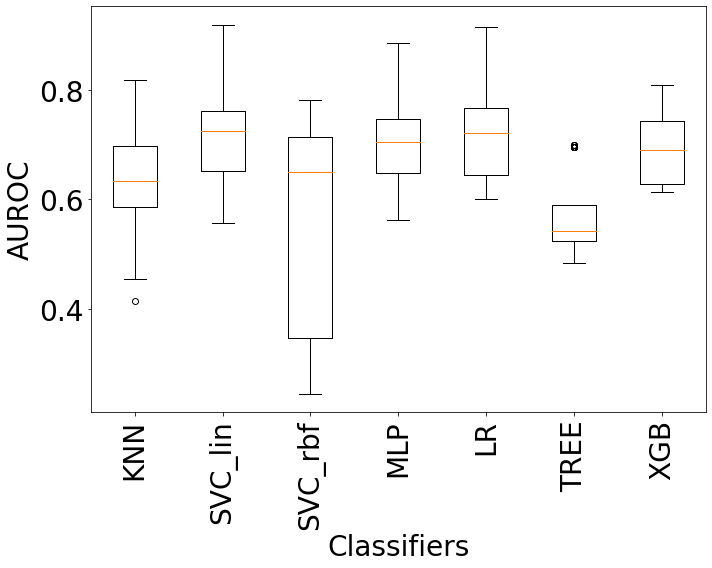

['None' 'Yeo-John' 'Box-Cox' 'Quant_Gaus' 'Quant_Unif']


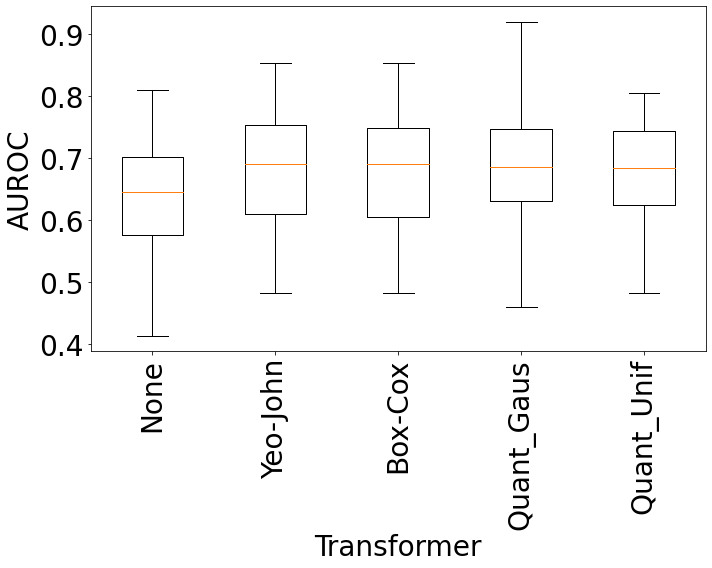

['None' 'RFECV_LR' 'RFECV_SVM' 'KBEST_CHI2' 'KBEST_MI' 'LASSO']


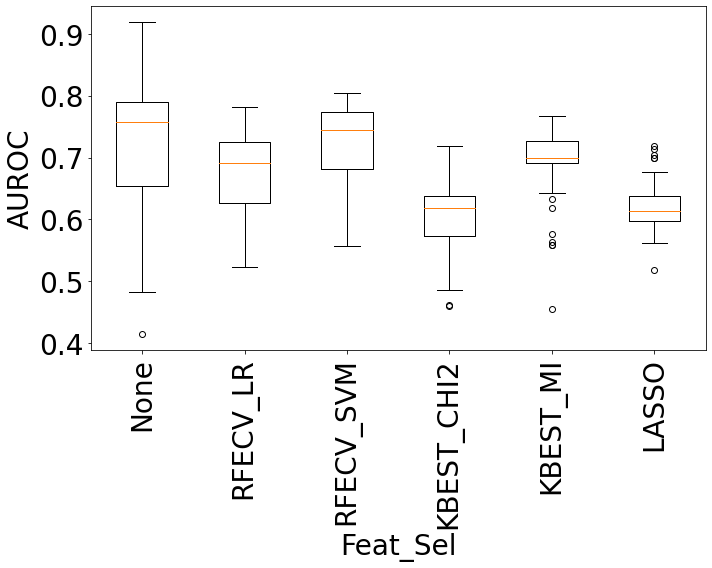

['MinMax' 'StdScal' 'Robust']


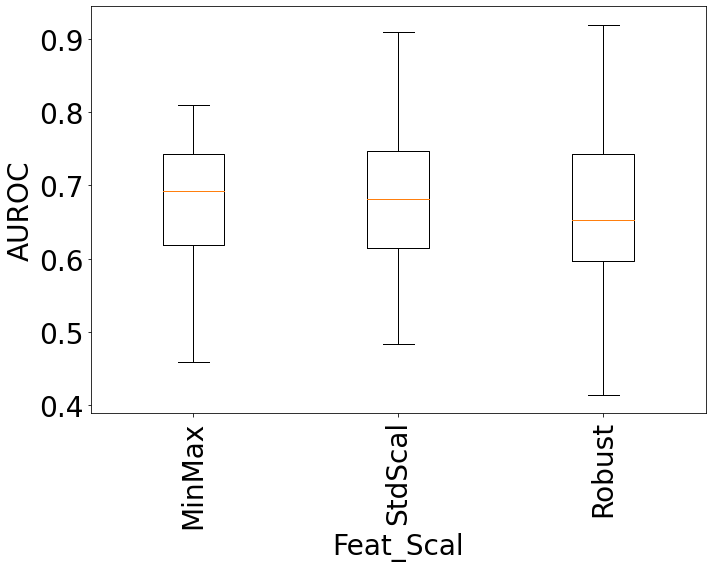

['MinMax' 'StdScal' 'Robust']


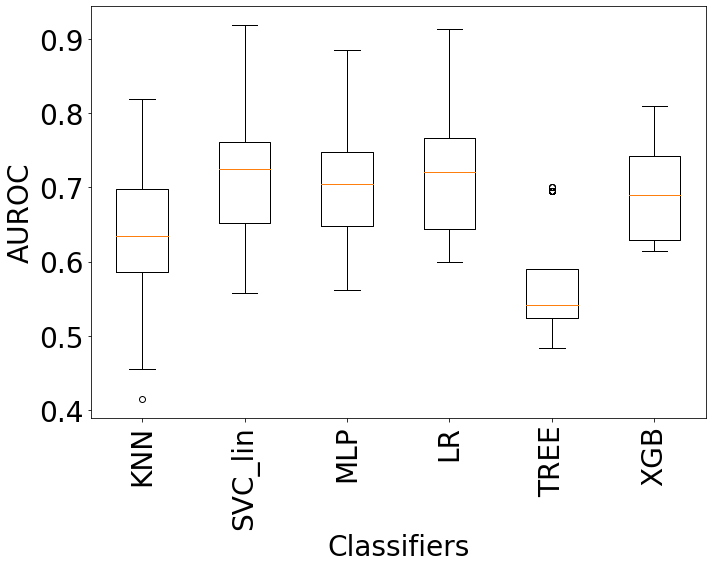

In [5]:
import matplotlib.pyplot as plt
import joblib
import pandas as pd
DF=joblib.load(root_path / 'Results')
df=DF.copy()

plt.rc('xtick',labelsize=28)
plt.rc('ytick',labelsize=28)
plt.rc('font', weight='normal')
    
# Classifier
clf=df['Classifier'].unique()
print(clf)
xx = []
for x in clf:
    xx.append(df['AUROC'].loc[df['Classifier']==x])

plt.figure(figsize=(10,8))
plt.boxplot(xx, labels=clf)
plt.xticks(rotation='vertical')
plt.ylabel('AUROC',fontsize=28)
plt.xlabel('Classifiers', fontsize=28)
plt.tight_layout()
plt.savefig('AUROC_Class0',dpi=300)
plt.show()

# Remove SVC_gamma
df=df.loc[df['Classifier']!='SVC_rbf']


# Transformer
tr=df['Transformer'].unique()
print(tr)
xx = []
for x in tr:
    xx.append(df['AUROC'].loc[df['Transformer']==x])

plt.figure(figsize=(10,8))
plt.boxplot(xx, labels=tr)
plt.xticks(rotation='vertical')
plt.ylabel('AUROC',fontsize=28)
plt.xlabel('Transformer', fontsize=28)
plt.tight_layout()
plt.savefig('AUROC_Transf',dpi=300)
plt.show()

# Feature Selection
sel=df['Feat_Sel'].unique()
print(sel)
xx = []
for x in sel:
    xx.append(df['AUROC'].loc[df['Feat_Sel']==x])

plt.figure(figsize=(10,8))
plt.boxplot(xx, labels=sel)
plt.xticks(rotation='vertical')
plt.ylabel('AUROC',fontsize=28)
plt.xlabel('Feat_Sel', fontsize=28)
plt.tight_layout()
plt.savefig('AUROC_Fsel',dpi=300)
plt.show()

# Feature Scaling
scal=df['Feat_Scal'].unique()
print(scal)
xx = []
for x in scal:
    xx.append(df['AUROC'].loc[df['Feat_Scal']==x])
    
plt.figure(figsize=(10,8))
plt.boxplot(xx, labels=scal)
plt.xticks(rotation='vertical')
plt.ylabel('AUROC',fontsize=28)
plt.xlabel('Feat_Scal', fontsize=28)
plt.tight_layout()
plt.savefig('AUROC_Fscal',dpi=300)
plt.show()

# Classifier
clf=df['Classifier'].unique()
print(scal)
xx = []
for x in clf:
    xx.append(df['AUROC'].loc[df['Classifier']==x])
    
plt.figure(figsize=(10,8))
plt.boxplot(xx, labels=clf)
plt.xticks(rotation='vertical')
plt.ylabel('AUROC',fontsize=28)
plt.xlabel('Classifiers', fontsize=28)
plt.tight_layout()
plt.savefig('AUROC_Class',dpi=300)
plt.show()

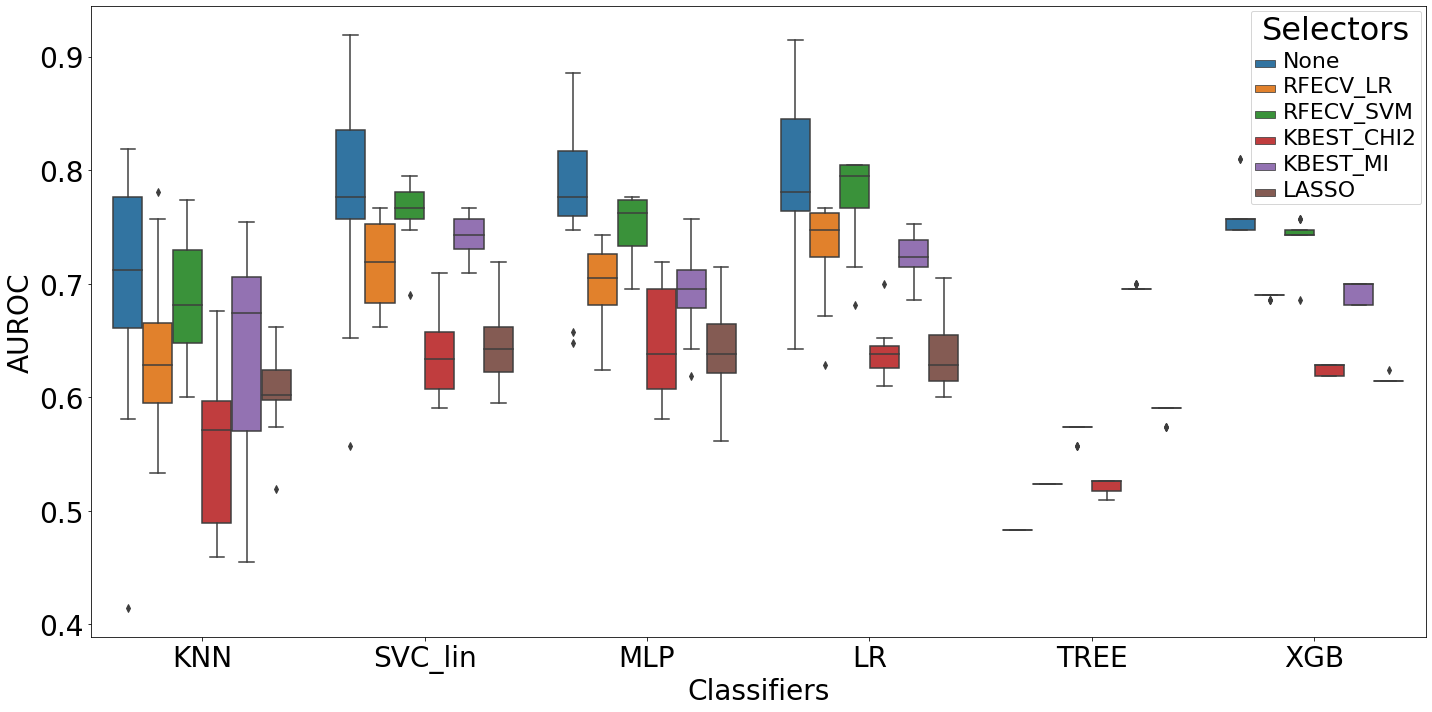

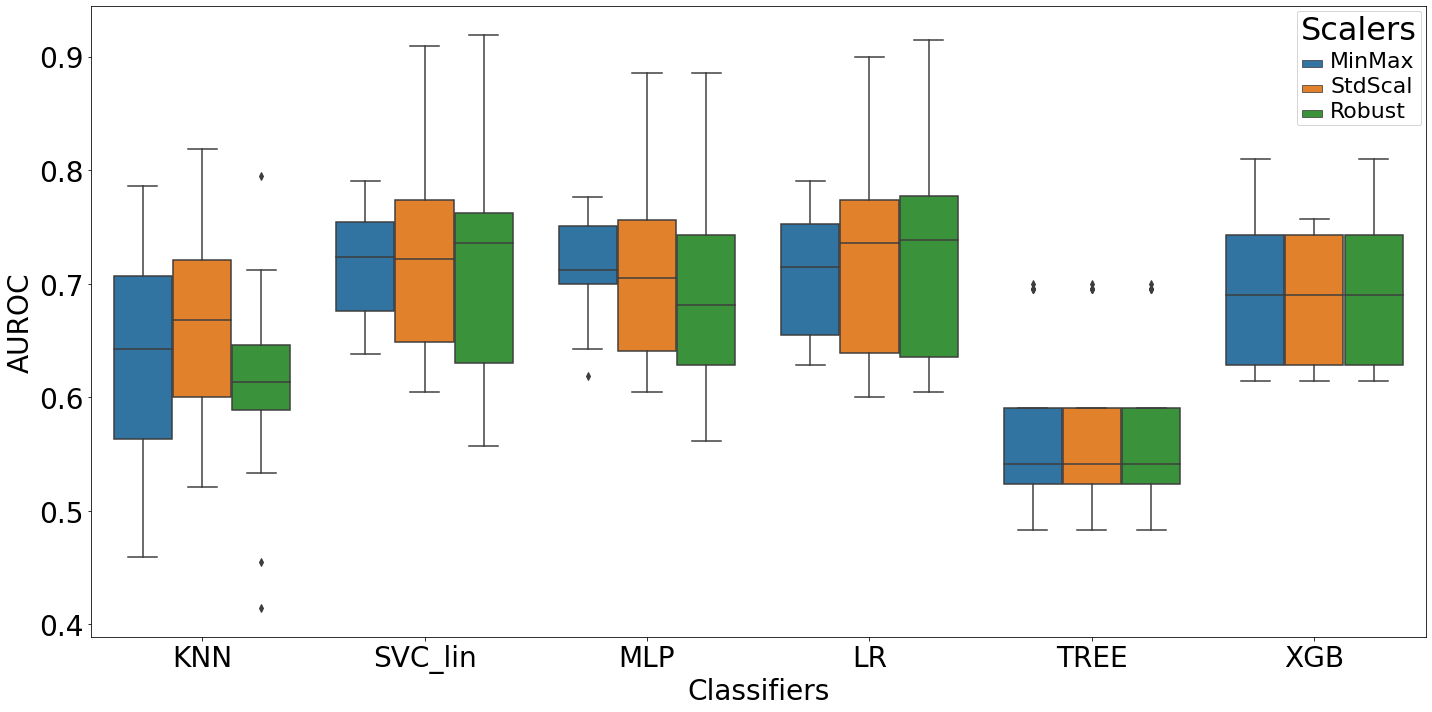

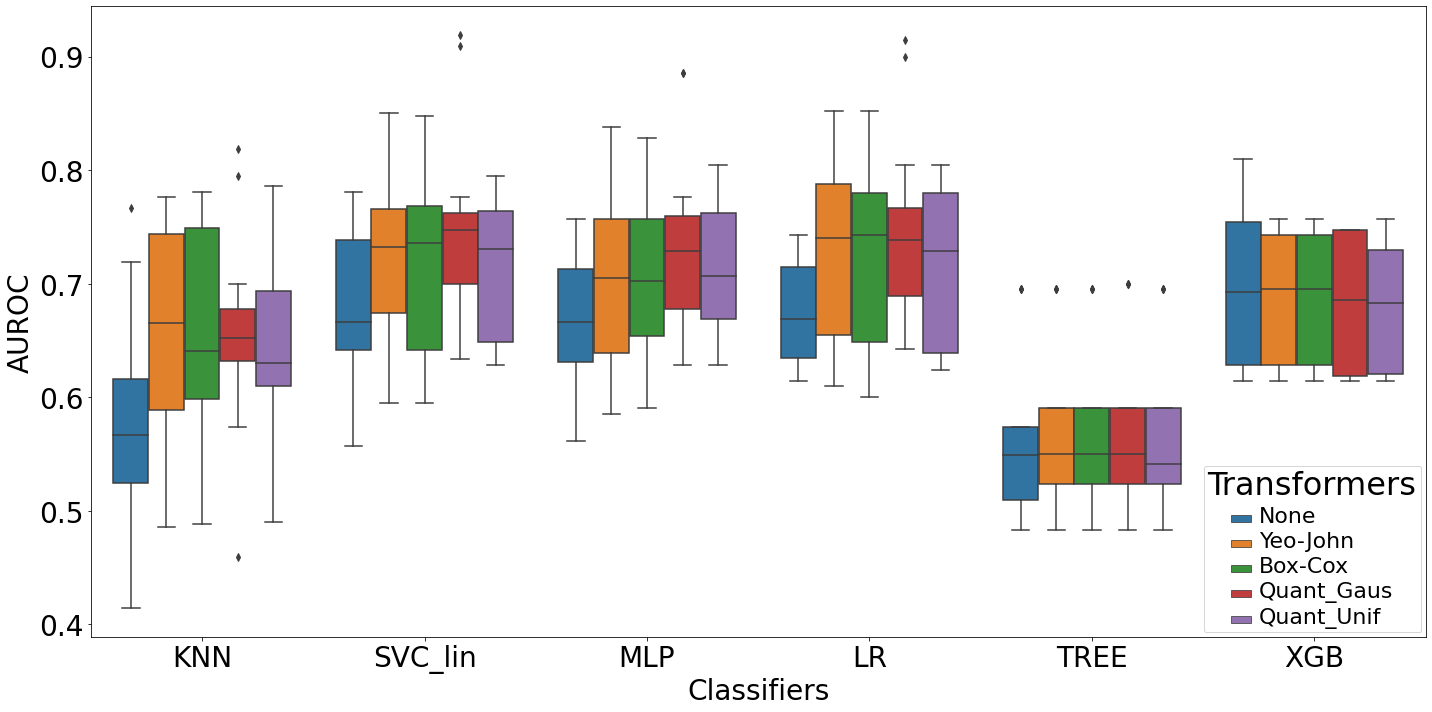

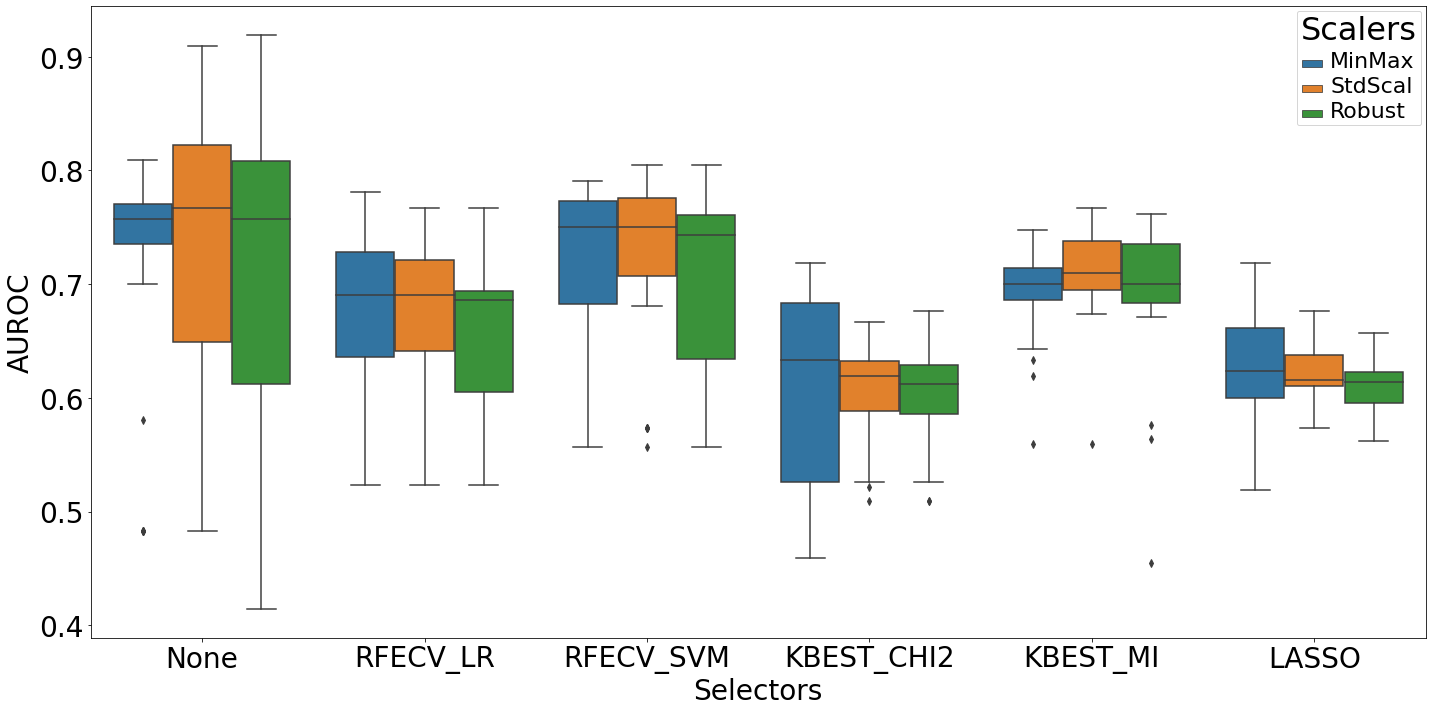

In [6]:
import seaborn as sns

plt.rc('xtick',labelsize=28)
plt.rc('ytick',labelsize=28)


plt.figure(figsize=(20,10))
ax=sns.boxplot(x='Classifier', y='AUROC',
            hue='Feat_Sel',# palette=["m", "g"],
            data=df)

ax.get_legend().set_title('Selectors')
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.xlabel('Classifiers', fontsize=28) 
plt.ylabel('AUROC', fontsize=28) 
plt.tight_layout()
plt.savefig('AUROC_clf_FSel.png',dpi=300)
plt.show()

plt.figure(figsize=(20,10))
ax=sns.boxplot(x='Classifier', y='AUROC',
            hue='Feat_Scal',# palette=["m", "g"],
            data=df)
ax.get_legend().set_title('Scalers')
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.xlabel('Classifiers', fontsize=28) 
plt.ylabel('AUROC', fontsize=28) 
plt.tight_layout()
plt.savefig('AUROC_clf_FScal.png',dpi=300)
plt.show()

plt.figure(figsize=(20,10))
ax=sns.boxplot(x='Classifier', y='AUROC',
            hue='Transformer',# palette=["m", "g"],
            data=df)
ax.get_legend().set_title('Transformers')
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.xlabel('Classifiers', fontsize=28) 
plt.ylabel('AUROC', fontsize=28) 
plt.tight_layout()
plt.savefig('AUROC_clf_Transf.png',dpi=300)
plt.show()


plt.figure(figsize=(20,10))
ax=sns.boxplot(x='Feat_Sel', y='AUROC',
            hue='Feat_Scal',# palette=["m", "g"],
            data=df)
ax.get_legend().set_title('Scalers')
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.xlabel('Selectors', fontsize=28) 
plt.ylabel('AUROC', fontsize=28) 
plt.tight_layout()
plt.savefig('AUROC_scal_sel.png',dpi=300)
plt.show()